In [1]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
s0=100.
E=100.
T=1.0
r=0.05
sigma=0.2
simulation=500
M=252
dt=T/M
Fixed_call_Arithmetic=0
Fixed_put_Arithmetic=0
Floating_call_Arithmetic=0
Floating_put_Arithmetic=0
discounting_factor=(np.exp(-r*T))

data_put_float=[]
data_Fixed_call={}
data_Floating_call={}
data_Fixed_put={}
data_Floating_put={}
no_of_simulations='No of Simulations'
call_values='Call Values'
put_values='Put Values'

for j in range(0, simulation):
    sum_s=0
   # product_s=1
    s=s0
    for i in range(0, M):
        e=np.random.normal()            
        s=s*(1+r*dt+sigma*np.sqrt(dt)*e)
        sum_s+=s
        #product_s*=s
    Average_st=sum_s/M
  
    fixed_call_val={j: max(Average_st-E,0)}
    floating_call_val={j: max(s-Average_st,0)}
    fixed_put_val={j: max(E-Average_st,0)}
    floating_put_val={j: max(Average_st-s,0)}
    data_Fixed_call.update(fixed_call_val)
    data_Floating_call.update(floating_call_val)
    data_Fixed_put.update(fixed_put_val)
    data_Floating_put.update(floating_put_val)
    Fixed_call_Arithmetic+=max(Average_st-E,0)
    Floating_call_Arithmetic+=max(s-Average_st,0)
    Fixed_put_Arithmetic+=max(E-Average_st,0)   
    Floating_put_Arithmetic+=max(Average_st-s,0)
 



def myplots(dictionary,simulation,title,xlabel,ylabel):
    plt.plot(list(dictionary.keys()), list(dictionary.values()), '.')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.axis([0, simulation, 0, 100])
    plt.show()


Fixed_call_Arithmetic 6.126119475647049
Standard error Fixed_call_Arithmetic 0.39232024618455263


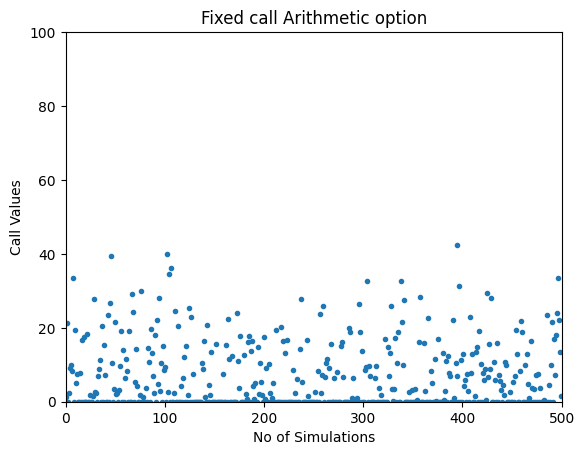

In [11]:
print('Fixed_call_Arithmetic',(Fixed_call_Arithmetic/simulation)*discounting_factor)
print('Standard error Fixed_call_Arithmetic',np.std(list(data_Fixed_call.values()))/np.sqrt(simulation))
myplots(data_Fixed_call,simulation,'Fixed call Arithmetic option',no_of_simulations,call_values)

Floating_call_Arithmetic 6.002477937174261
Standard error Floating_call_Arithmetic 0.402950834539792


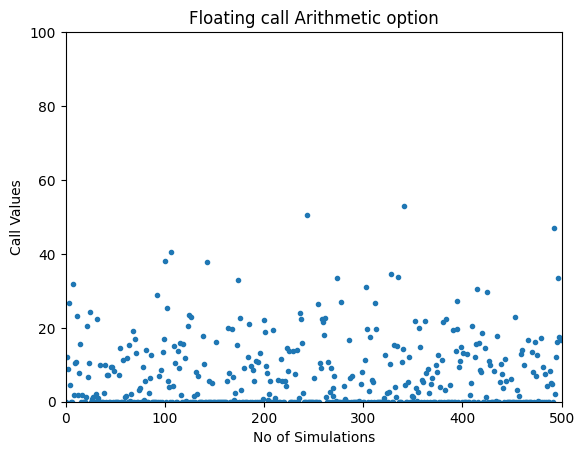

In [13]:

print('Floating_call_Arithmetic',(Floating_call_Arithmetic/simulation)*discounting_factor)
print('Standard error Floating_call_Arithmetic',np.std(list(data_Floating_call.values()))/np.sqrt(simulation))
myplots(data_Floating_call,simulation,'Floating call Arithmetic option',no_of_simulations,call_values)

Fixed_put_Arithmetic 3.266255557902413
Standard error Fixed_put_Arithmetic 0.24029589884321104


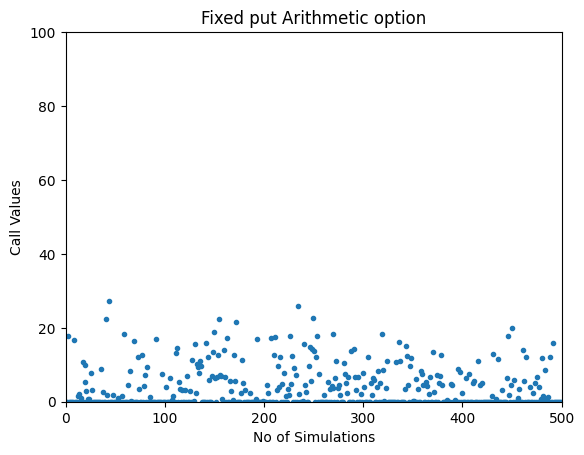

In [15]:
print('Fixed_put_Arithmetic',(Fixed_put_Arithmetic/simulation)*discounting_factor)
print('Standard error Fixed_put_Arithmetic',np.std(list(data_Fixed_put.values()))/np.sqrt(simulation))

myplots(data_Fixed_put,simulation,'Fixed put Arithmetic option',no_of_simulations,call_values)


Floating_put_Arithmetic 3.4970168426372394
Standard error Floating_put_Arithmetic 0.24598244659435092


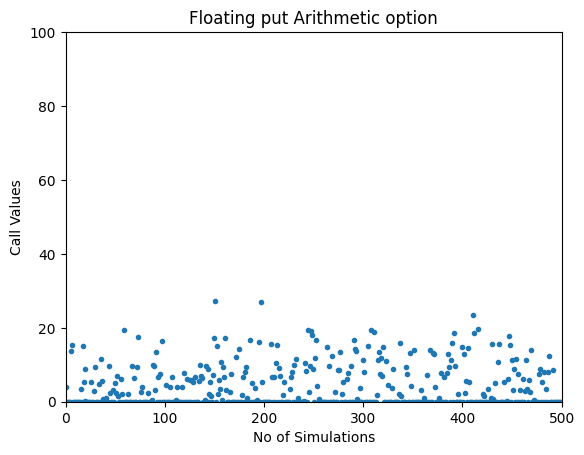

In [17]:
print('Floating_put_Arithmetic',(Floating_put_Arithmetic/simulation)*discounting_factor)
print('Standard error Floating_put_Arithmetic',np.std(list(data_Floating_put.values()))/np.sqrt(simulation))
myplots(data_Floating_put,simulation,'Floating put Arithmetic option',no_of_simulations,call_values)